In [1]:
import gym
import numpy as np

import time

In [2]:
import sys
import os

sys.path.append(os.path.abspath('../'))

del sys, os

In [3]:
import matplotlib.pyplot as plt

In [4]:
# LaTeX rendering in graphs
from distutils.spawn import find_executable
if find_executable('latex'):
    plt.rc('text', usetex=True)

plt.rc('font', family='serif')

# High resolution graphs
%config InlineBackend.figure_format = 'retina'

In [5]:
import torch

In [6]:
%reload_ext autoreload
%autoreload 2

In [7]:
import models.rnn as rnns
import models.mlp as mlps
import models.linear as linears
import control.agents as agents
import control.environments as env

In [8]:
from utils.notifications import Slack

In [9]:
import copy

# Setup

In [13]:
env_name = 'Taxi-v2'
#env_name = 'Breakout-ram-v0'

In [14]:
environment = env.Environment(
    environment=gym.make(env_name), 
    agent=None,
    verbose=True,
    max_steps=200,
    capacity=100,
    representation_method='one_hot_encoding'
)

/anaconda3/envs/rl/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [15]:
model = linears.Linear(
    input_dimension=environment.get_input_dimension(), 
    n_actions=environment.n_actions,
)
optimiser = torch.optim.Adam(model.parameters(), lr=.5)
agent = agents.DQNAgent(model, optimiser, gamma=1., temperature=10, algorithm='sarsa', n_actions=environment.n_actions)
environment.agent = agent

In [14]:
print(environment.agent.q(environment.state_representation(environment.environment.reset())))
model.load_state_dict(torch.load('../saved/taxi/mlp/state_dict.pth'))
agent.commit()
print(environment.agent.q(environment.state_representation(environment.environment.reset())))

[ 0.05376931 -0.00200654  0.00310871  0.05790284 -0.01841988 -0.06111596]
[-152.5814  -151.62679 -152.77357 -152.7423  -151.98988 -152.57753]


# Experiment

## Training

In [16]:
agent.commit()
returns_train = []
returns_eval = []
q_estimation = []

for _ in range(10):
    
    returns = environment.train(segments=10, episodes=100)

    plt.figure()
    plt.plot(returns.T[0], label='training')
    plt.plot(returns.T[1], label='evaluation')
    plt.legend()
    plt.show()
    
    #agent.temperature *= .8
    
    returns_train.append(np.mean(returns.T[0]))
    returns_eval.append(np.mean(returns.T[1]))

    q_estimation.append(environment.agent.q(environment.state_representation(environment.environment.reset())))
    
    environment.agent.save('../saved/taxi/mlp')

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

tensor([-0.0306], grad_fn=<SelectBackward>)
tensor([0.0407], grad_fn=<SelectBackward>)
tensor([0.0311], grad_fn=<SelectBackward>)
tensor([0.0297], grad_fn=<SelectBackward>)
tensor([ 0.0401,  0.0359,  0.0355, -0.0257, -0.0252, -0.0444],
       grad_fn=<SqueezeBackward3>)
[-9.9965595  -9.9679742  -9.98654228 -9.97316486 -9.96980024 -9.95926006]
5

tensor([0.0186], grad_fn=<SelectBackward>)
tensor([-0.0173], grad_fn=<SelectBackward>)
tensor([-0.0357], grad_fn=<SelectBackward>)
tensor([-0.0414], grad_fn=<SelectBackward>)
tensor([-0.0357], grad_fn=<SelectBackward>)
tensor([0.0152], grad_fn=<SelectBackward>)
tensor([ 0.0401,  0.0359, -0.9921, -0.0257, -0.0252, -1.2425],
       grad_fn=<SqueezeBackward3>)
[-10.01729914 -10.02138067 -10.01216656 -10.01282342 -10.00254675
 -10.02360207]
4

tensor([0.0317], grad_fn=<SelectBackward>)
tensor([0.0390], grad_fn=<SelectBackward>)
tensor([-0.2017], grad_fn=<SelectBackward>)
tensor([-0.0202], grad_fn=<SelectBackward>)
tensor([0.0040], grad_fn=<SelectBa

 10%|######4                                                         | 1/10 [00:02<00:23,  2.62s/it]

tensor([-2.6240], grad_fn=<SelectBackward>)
tensor([-1.1942], grad_fn=<SelectBackward>)
tensor([-2.5096], grad_fn=<SelectBackward>)
tensor([-2.1204], grad_fn=<SelectBackward>)
tensor([ 0.0401,  0.0359, -0.7301, -1.9168, -3.9611, -3.6694],
       grad_fn=<SqueezeBackward3>)
[ -9.99319201 -10.01494703  -9.99860849  -9.97646908 -10.03313676
  -9.99575203]
5

tensor([-1.0524], grad_fn=<SelectBackward>)
tensor([-2.3872], grad_fn=<SelectBackward>)
tensor([-1.2560], grad_fn=<SelectBackward>)
tensor([-2.7861], grad_fn=<SelectBackward>)
tensor([-2.3546], grad_fn=<SelectBackward>)
tensor([-3.1730], grad_fn=<SelectBackward>)
tensor([ 0.0401,  0.0359, -0.7059, -2.3096, -4.6899, -4.7085],
       grad_fn=<SqueezeBackward3>)
[ -9.98039295 -10.03459991 -10.01071563  -9.95723611 -10.02976632
  -9.97107666]
4

tensor([-0.8177], grad_fn=<SelectBackward>)
tensor([-0.9612], grad_fn=<SelectBackward>)
tensor([-0.8529], grad_fn=<SelectBackward>)
tensor([-1.0573], grad_fn=<SelectBackward>)
tensor([-2.0781], gr

 20%|############8                                                   | 2/10 [00:05<00:22,  2.81s/it]

tensor([-9.8697], grad_fn=<SelectBackward>)
tensor([-10.0150], grad_fn=<SelectBackward>)
tensor([-9.8435], grad_fn=<SelectBackward>)
tensor([-0.7935], grad_fn=<SelectBackward>)
tensor([-4.5483], grad_fn=<SelectBackward>)
tensor([-10.1068], grad_fn=<SelectBackward>)
tensor([-10.7545], grad_fn=<SelectBackward>)
tensor([-10.8966], grad_fn=<SelectBackward>)
tensor([-0.7213], grad_fn=<SelectBackward>)
tensor([-10.8445], grad_fn=<SelectBackward>)
tensor([0.0434], grad_fn=<SelectBackward>)
tensor([-12.3570], grad_fn=<SelectBackward>)
tensor([0.8056], grad_fn=<SelectBackward>)
tensor([-10.1904], grad_fn=<SelectBackward>)
tensor([-0.4726], grad_fn=<SelectBackward>)
tensor([-11.4193], grad_fn=<SelectBackward>)
tensor([-0.1531], grad_fn=<SelectBackward>)
tensor([-1.4547], grad_fn=<SelectBackward>)
tensor([-10.9262], grad_fn=<SelectBackward>)
tensor([0.4632], grad_fn=<SelectBackward>)
tensor([-1.9751], grad_fn=<SelectBackward>)
tensor([-10.0001], grad_fn=<SelectBackward>)
tensor([-1.1309], grad_fn

 30%|###################2                                            | 3/10 [00:08<00:18,  2.64s/it]

tensor([-2.1286], grad_fn=<SelectBackward>)
tensor([-2.4261], grad_fn=<SelectBackward>)
tensor([-2.5864], grad_fn=<SelectBackward>)
tensor([-12.2754], grad_fn=<SelectBackward>)
tensor([-3.8451], grad_fn=<SelectBackward>)
tensor([-2.7114], grad_fn=<SelectBackward>)
tensor([-2.9601], grad_fn=<SelectBackward>)
tensor([-3.1355], grad_fn=<SelectBackward>)
tensor([-3.1107], grad_fn=<SelectBackward>)
tensor([-4.7959], grad_fn=<SelectBackward>)
tensor([-12.8667], grad_fn=<SelectBackward>)
tensor([-3.7362], grad_fn=<SelectBackward>)
tensor([-2.8052], grad_fn=<SelectBackward>)
tensor([-2.8248], grad_fn=<SelectBackward>)
tensor([-4.0705], grad_fn=<SelectBackward>)
tensor([-3.7725], grad_fn=<SelectBackward>)
tensor([-10.3319], grad_fn=<SelectBackward>)
tensor([-4.4361], grad_fn=<SelectBackward>)
tensor([-3.6144], grad_fn=<SelectBackward>)
tensor([-12.6870], grad_fn=<SelectBackward>)
tensor([-3.2881], grad_fn=<SelectBackward>)
tensor([-5.7804], grad_fn=<SelectBackward>)
tensor([-3.6751], grad_fn=<S

tensor([-4.6532], grad_fn=<SelectBackward>)
tensor([-4.7056], grad_fn=<SelectBackward>)
tensor([-5.9959], grad_fn=<SelectBackward>)
tensor([-3.6946], grad_fn=<SelectBackward>)
tensor([-5.3669], grad_fn=<SelectBackward>)
tensor([-4.4186], grad_fn=<SelectBackward>)
tensor([-12.2020], grad_fn=<SelectBackward>)
tensor([-4.9104], grad_fn=<SelectBackward>)
tensor([-6.3043], grad_fn=<SelectBackward>)
tensor([-4.2471], grad_fn=<SelectBackward>)
tensor([-13.8100], grad_fn=<SelectBackward>)
tensor([-3.7410], grad_fn=<SelectBackward>)
tensor([-14.2109], grad_fn=<SelectBackward>)
tensor([-4.0455], grad_fn=<SelectBackward>)
tensor([-5.8774], grad_fn=<SelectBackward>)
tensor([-5.2407], grad_fn=<SelectBackward>)
tensor([-4.9515], grad_fn=<SelectBackward>)
tensor([-4.3088], grad_fn=<SelectBackward>)
tensor([-9.9882], grad_fn=<SelectBackward>)
tensor([-4.6512], grad_fn=<SelectBackward>)
tensor([-7.0830], grad_fn=<SelectBackward>)
tensor([-4.6928], grad_fn=<SelectBackward>)
tensor([-2.0998], grad_fn=<Se

 40%|#########################6                                      | 4/10 [00:12<00:19,  3.19s/it]

tensor([-3.7948], grad_fn=<SelectBackward>)
tensor([-4.0994], grad_fn=<SelectBackward>)
tensor([-4.5045], grad_fn=<SelectBackward>)
tensor([-12.9295], grad_fn=<SelectBackward>)
tensor([-3.6521], grad_fn=<SelectBackward>)
tensor([-6.3515], grad_fn=<SelectBackward>)
tensor([-3.1099], grad_fn=<SelectBackward>)
tensor([-5.4708], grad_fn=<SelectBackward>)
tensor([-6.3211], grad_fn=<SelectBackward>)
tensor([-5.5651], grad_fn=<SelectBackward>)
tensor([-5.2785], grad_fn=<SelectBackward>)
tensor([-3.7611], grad_fn=<SelectBackward>)
tensor([-5.4099], grad_fn=<SelectBackward>)
tensor([-5.7771], grad_fn=<SelectBackward>)
tensor([-2.8122], grad_fn=<SelectBackward>)
tensor([-5.8496], grad_fn=<SelectBackward>)
tensor([-4.1303], grad_fn=<SelectBackward>)
tensor([-4.1221], grad_fn=<SelectBackward>)
tensor([-4.1785], grad_fn=<SelectBackward>)
tensor([-2.8777], grad_fn=<SelectBackward>)
tensor([-4.2697], grad_fn=<SelectBackward>)
tensor([-4.6988], grad_fn=<SelectBackward>)
tensor([-5.1808], grad_fn=<Sele

 50%|################################                                | 5/10 [00:16<00:16,  3.36s/it]

tensor([-6.1191], grad_fn=<SelectBackward>)
tensor([-5.4188], grad_fn=<SelectBackward>)
tensor([-16.0448], grad_fn=<SelectBackward>)
tensor([-6.0275], grad_fn=<SelectBackward>)
tensor([-6.1333], grad_fn=<SelectBackward>)
tensor([-5.1870], grad_fn=<SelectBackward>)
tensor([-15.1179], grad_fn=<SelectBackward>)
tensor([-8.6953], grad_fn=<SelectBackward>)
tensor([-6.8203], grad_fn=<SelectBackward>)
tensor([-5.5624], grad_fn=<SelectBackward>)
tensor([-6.1256], grad_fn=<SelectBackward>)
tensor([-15.3594], grad_fn=<SelectBackward>)
tensor([-5.8454], grad_fn=<SelectBackward>)
tensor([-7.3458], grad_fn=<SelectBackward>)
tensor([-5.3126], grad_fn=<SelectBackward>)
tensor([-12.8951,  -7.3574,  -5.0986,  -6.0635, -12.2272, -14.2544],
       grad_fn=<SqueezeBackward3>)
[-16.31755638 -18.33840275 -17.11947966 -16.24891376 -24.71389484
 -24.94824314]
5

tensor([-5.6026], grad_fn=<SelectBackward>)
tensor([-6.5022], grad_fn=<SelectBackward>)
tensor([-7.6430], grad_fn=<SelectBackward>)
tensor([-8.6778],

 60%|######################################4                         | 6/10 [00:19<00:13,  3.25s/it]

tensor([-7.9553], grad_fn=<SelectBackward>)
tensor([-24.6347], grad_fn=<SelectBackward>)
tensor([-24.1323], grad_fn=<SelectBackward>)
tensor([-8.5929], grad_fn=<SelectBackward>)
tensor([-11.3451], grad_fn=<SelectBackward>)
tensor([-12.0102], grad_fn=<SelectBackward>)
tensor([-8.8220], grad_fn=<SelectBackward>)
tensor([-9.7125], grad_fn=<SelectBackward>)
tensor([-9.5020], grad_fn=<SelectBackward>)
tensor([-8.2527], grad_fn=<SelectBackward>)
tensor([-8.5101], grad_fn=<SelectBackward>)
tensor([-8.5300], grad_fn=<SelectBackward>)
tensor([-9.6000], grad_fn=<SelectBackward>)
tensor([-11.3873], grad_fn=<SelectBackward>)
tensor([-10.0227], grad_fn=<SelectBackward>)
tensor([-15.1662], grad_fn=<SelectBackward>)
tensor([-15.7670], grad_fn=<SelectBackward>)
tensor([-10.7669], grad_fn=<SelectBackward>)
tensor([-13.3383], grad_fn=<SelectBackward>)
tensor([-11.1416], grad_fn=<SelectBackward>)
tensor([-11.7349], grad_fn=<SelectBackward>)
tensor([-11.8055], grad_fn=<SelectBackward>)
tensor([-10.7340], 

 70%|############################################8                   | 7/10 [00:23<00:10,  3.39s/it]

tensor([-9.5012], grad_fn=<SelectBackward>)
tensor([-10.5014], grad_fn=<SelectBackward>)
tensor([-10.6010], grad_fn=<SelectBackward>)
tensor([-9.7389], grad_fn=<SelectBackward>)
tensor([-9.8898], grad_fn=<SelectBackward>)


KeyboardInterrupt: 

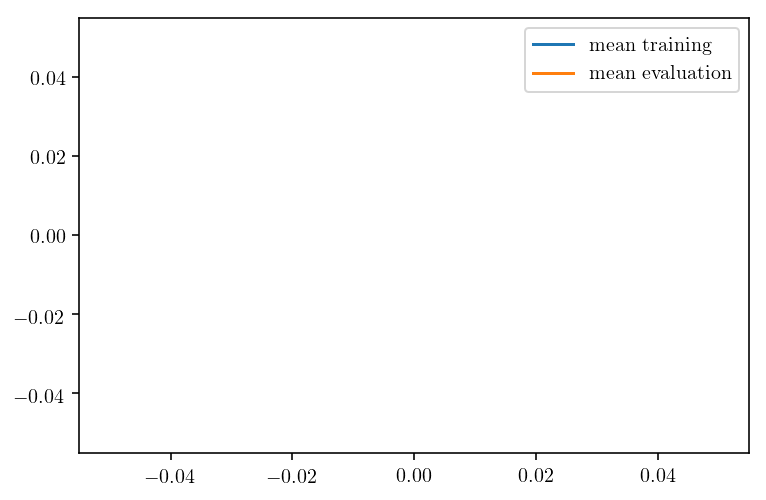

IndexError: too many indices for array

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure()
plt.plot(returns_train, label='mean training')
plt.plot(returns_eval, label='mean evaluation')
plt.legend()
plt.show()

q_estimation = np.asarray(q_estimation)
plt.figure()
for i in range(environment.n_actions):
    plt.plot(q_estimation[:, i], label='action ' + str(i))
plt.legend()
plt.show()

## Testing

In [17]:
for _ in range(1):
    environment.exploration_episode(render=True)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
269
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
269
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
169
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
149
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
169
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
189
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
89
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
69
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
49
+---------+
|R: | : :G|
| : : : : |
| :

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
469
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
469
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
469
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
469
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
369
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
369
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
469
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
469
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
489
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
469
+---------+
|R: | :

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
449
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
449
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
429
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
429
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
429
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
449
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
449
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
449
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
449
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
429
+---------+
|R: | : :G|

In [26]:
for _ in range(1):
    environment.evaluation_episode(render=True)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+--

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: 

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: 

## Save

In [41]:
environment.agent.save('../saved/mixed_mlp')